In [2]:
import pandas as pd
# pip install numpy-financial
import numpy_financial as npf
# import numpy as np  - deprecated

In [2]:
npf.irr([-250000, 100000, 150000, 200000, 250000, 300000])

0.5672303344358536

In [3]:
npf.pmt(0.085/12, 12*12, 100000)

-1110.0555643145096

## Rata mensile di un prestito
10.000€

in 3 anni con rata mensile -> 3 x 12 = 36

TAN annuo 6.00% -> tasso periodale = 6.00%/12 = 0.05%

**con Excel** -> RATA(0,06/12;3*12;10000;0)

In [20]:
df = pd.DataFrame({'Obs':[1]})
df['rate'] = 0.06/12
df['nper'] = 3*12
df['pv'] = 10000
df['fv'] = 0

df['pmt'] = npf.pmt(df.rate, df.nper, df.pv, df.fv)
df

,Obs,rate,nper,pv,fv,pmt
0,1,0.005,36,10000,0,-304.219375


In [21]:
# senza dataframe
rate = 0.06/12
nper = 3*12
pv = 10000
fv = 0

pmt = npf.pmt(rate, nper, pv, fv)
pmt

-304.21937451555715

## Computing the future value of an investment

In [7]:
df = pd.DataFrame({'Obs':[1]})
df['rate'] = 0.06/12
df['nper'] = 60
df['pmt'] = -200
df['pv'] = 10000
df['fv'] = npf.fv(df.rate, df.nper, df.pmt, df.pv)
df

,Obs,rate,nper,pmt,pv,fv
0,1,0.005,60,-200,10000,465.504576


In [12]:
# senza dataframe
rate = 0.06/12
nper = 60
pmt= -200
pv = 10000

fv = npf.fv(rate,nper,pmt,pv)
fv

465.50457647922485

## Computing the present value of an investment
find out what is left of the loan of 10.000 if you pay 200 per month over the next 60 month.

The yearly interest rate is 6% per year, and is calculated monthly.

In [10]:
df = pd.DataFrame({'Obs':[1]})
df['rate'] = 0.06/12
df['nper'] = 12*5
df['pmt'] = -200
df['fv'] = 0
df['pv'] = npf.pv(df.rate, df.nper, df.pmt, df.fv)
df

,Obs,rate,nper,pmt,fv,pv
0,1,0.005,60,-200,0,10345.11215


## Computing the number of periodic payments we have to make
What about the number of payments you need to make to pay back 10.000 with 200 per month?

In [13]:
df = pd.DataFrame({'Obs':[1]})
df['rate'] = 0.06/12
df['pmt'] = -200
df['pv'] = 10000
df['fv'] = 0

df['nper'] = npf.nper(df.rate, df.pmt, df.pv, df.fv)
df

,Obs,rate,pmt,pv,fv,nper
0,1,0.005,-200,10000,0,57.680136


## What is the annual interest?

Now we want to look at the yearly interest rate when you pay back a loan of 10,000 with 60 monthly payments of 200.

In [14]:
df = pd.DataFrame({'Obs':[1]})
df['nper'] = 60
df['pmt'] = -200
df['pv'] = 10000
df['fv'] = 0

df['rate'] = npf.rate(df.nper, df.pmt, df.pv, df.fv) * 12
df

,Obs,nper,pmt,pv,fv,rate
0,1,60,-200,10000,0,0.074201


## Calculating the principal payment amount
If you want to know how much principal you would pay each month, you can use the ppmt method.

In [22]:
df = pd.DataFrame()
df['period'] = range(1, 121)
df['rate'] = 0.06/12
df['nper'] = 3*12
df['pv'] = 10000
df['fv'] = 0
df['ppmt'] = npf.ppmt(df.rate, df.period, df.nper, df.pv, df.fv)
df

,period,rate,nper,pv,fv,ppmt
0,1,0.005,36,10000,0,-254.219375
1,2,0.005,36,10000,0,-255.490471
2,3,0.005,36,10000,0,-256.767924
3,4,0.005,36,10000,0,-258.051763
4,5,0.005,36,10000,0,-259.342022
...,...,...,...,...,...,...
115,116,0.005,36,10000,0,-451.134196
116,117,0.005,36,10000,0,-453.389867
117,118,0.005,36,10000,0,-455.656816
118,119,0.005,36,10000,0,-457.935100


## The effective annual interest rate

There are other financial calculations we can do.

The first is how to calculate the effective interest rate if you are charged monthly interest.

In [16]:
rate = 0.06
nper = 12
effect = (1 + rate/nper)**nper - 1

print('The effective interest rate is: ', effect)

The effective interest rate is:  0.06167781186449828


In [17]:
df = pd.DataFrame({'Obs':[1]})
df['rate'] = rate
df['nper'] = nper
df['effect'] = (1 + df.rate/df.nper)**df.nper - 1
df

,Obs,rate,nper,effect
0,1,0.06,12,0.061678


## Computing the internal rate of return for a series of cash flows

There are other useful calculations you can use in finance. Internal rate of return is one of them.
In this example, you invest 40.000 and receive four payment in return. The function returns the IRR of this investment.

In [19]:
df = pd.DataFrame()
df['cashflow'] = [-40000, 5000, 8000, 12000, 30000]
df['irr'] = npf.irr(df['cashflow'])
df

,cashflow,irr
0,-40000,0.105823
1,5000,0.105823
2,8000,0.105823
3,12000,0.105823
4,30000,0.105823


In [20]:
# senza dataframe
irr = npf.irr(df['cashflow'])
irr

0.10582259840890185

In [21]:
# senza dataframe
npf.irr([-40000,5000,8000,12000,30000])

0.10582259840890185

## Calculating the net present value

This is a very interesting formula. For many years the explanations of how to use this formula have been wrong in both SAS and Excel.

When you calculate a net, you have to deduct something. But that is not explained in the documentations of SAS and Microsoft. So the function is not calculating npv.

You have to add a deduction to get the right result. In Python, every thing is calculated correctly from the beginning.

In [22]:
df = pd.DataFrame()
df['values'] = [-40000, 5000, 8000, 12000, 30000]
df['rate'] = 0.08
df['npv'] = npf.npv(df['rate'],df['values'])
df

,values,rate,npv
0,-40000,0.08,3065.222668
1,5000,0.08,3065.222668
2,8000,0.08,3065.222668
3,12000,0.08,3065.222668
4,30000,0.08,3065.222668


In [23]:
5000/(1+0.08)**1 + 8000/(1+0.08)**2 + 12000/(1+0.08)**3 + 30000/(1+0.08)**4 - 40000

3065.222668179529

In [25]:
# This last example shows how to separate the two values, investment and cashflow. 
# If you have the values in each list, you can add the two list's in the function as investment+cashflow
rate = 0.08
investment = [-40000]
cashflow = [5000, 8000, 12000, 30000]
npf.npv(rate,investment+cashflow)

3065.2226681795255

## Calcolo dell'IRR
Supponiamo che un manager abbia l'opportunità di investire in due progetti, ma possa sceglierne solo uno. I progetti sono:

Il progetto 1 richiede investimenti di 800 milioni di dollari oggi, ma pagherà 200.250.300.350.400 milioni di pagamenti ogni anno per i prossimi 5 anni.

Il progetto 2 ha richiesto investimenti di 500 milioni di dollari oggi, ma pagherà 150.170.178.250.300 di pagamenti ogni anno per i prossimi 5 anni.

In che modo il manager deciderà quale progetto scegliere? Per risolvere questo problema dobbiamo calcolare l'IRR dei due progetti. Mostriamo la soluzione di seguito. 

In [10]:
import numpy as np
project1_cf = pd.DataFrame({"Year":np.arange(0,6),"cf": [-800,200,250,300,350,400]})
project2_cf = pd.DataFrame({"Year":np.arange(0,6),"cf": [-500,150,170,178,250,300]})
print(project1_cf)


   Year   cf
0     0 -800
1     1  200
2     2  250
3     3  300
4     4  350
5     5  400


In [11]:
irr1 = npf.irr(project1_cf["cf"])
irr2 = npf.irr(project2_cf["cf"])
irr_df = pd.DataFrame({"Name":["Project1", "Project2"],
                      "IRR":[irr1, irr2]})
print(irr_df)

       Name       IRR
0  Project1  0.221603
1  Project2  0.267620


## Risultati diversi per IRR da numpy.irr e dalla funzione IRR di Excel 
https://stackoverflow.com/questions/52771770/different-results-for-irr-from-numpy-irr-and-the-excel-irr-function

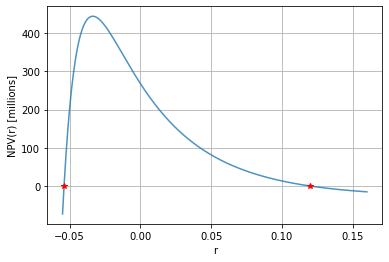

In [16]:
import matplotlib.pyplot as plt


w = np.array([   -56501, -14918073,  -1745198, -20887403,  -9960686, -31076934,
                      0,         0,  11367846,  26736802,  -2341940,  20853917,
               22166416,  19214094,  23056582, -11227178,  18867100,  24947517,
               28733869,  24707603, -17030396,   7753089,  27526723,  31534327,
               26726270, -24607953,  11532035,  29444013,  24350595,  30140678,
              -33262793,   5640172,  32846900,  38165710,  31655489, -74343373,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,         0,         0,         0,         0,         0,
                      0,  -8727068])

r_excel = 0.1200963665

r_numpy = npf.irr(w)

rr = np.linspace(-0.055, 0.16, 500)
npvals = np.array([npf.npv(r, w) for r in rr])

plt.plot(rr, npvals/1e6, alpha=0.8)
plt.plot(r_numpy, 0, 'r*')
plt.plot(r_excel, 0, 'r*')

plt.grid(True)
plt.xlabel('r')
plt.ylabel('NPV(r) [millions]')

plt.show()

## [Building a Financial Model with Pandas](https://pbpython.com/amortization-model-revised.html)


In [40]:
Interest_Rate = 0.06
Years = 3
Payments_Year = 12
Principal = 10000
Addl_Princ = 2.5

from datetime import date
start_date = (date(2016,1,1))

In [30]:
pmt = npf.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)
pmt

-304.21937451555715

In [31]:
# Period to calculate
per = 1

# Calculate the interest
ipmt = npf.ipmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

# Calculate the principal
ppmt = npf.ppmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

print(ipmt, ppmt)

-50.0 -254.21937451555715


In [32]:
per = 30 # Period to calculate
# Calculate the interest
ipmt = npf.ipmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

# Calculate the principal
ppmt = npf.ppmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)
print(ipmt, ppmt)

-10.437879355387858 -293.7814951601693


In [33]:
rng = pd.date_range(start_date, periods=Years * Payments_Year, freq='MS')
rng.name = "Payment_Date"

In [34]:
rng

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Payment_Date', freq='MS')

In [35]:
df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 'Addl_Principal', 'Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Period"

In [43]:
df

,Payment_Date,Payment,Principal,Interest,Addl_Principal,Balance
Period,,,,,,
1,2016-01-01,NaN,-254.22,-50.00,-2.5,NaN
2,2016-02-01,NaN,-255.49,-48.73,-2.5,NaN
3,2016-03-01,NaN,-256.77,-47.45,-2.5,NaN
4,2016-04-01,NaN,-258.05,-46.17,-2.5,NaN
5,2016-05-01,NaN,-259.34,-44.88,-2.5,NaN
6,2016-06-01,NaN,-260.64,-43.58,-2.5,NaN
7,2016-07-01,NaN,-261.94,-42.28,-2.5,NaN
8,2016-08-01,NaN,-263.25,-40.97,-2.5,NaN
9,2016-09-01,NaN,-264.57,-39.65,-2.5,NaN


In [37]:
df["Principal"] = npf.ppmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)
df["Interest"] = npf.ipmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)

In [42]:
# Convert to a negative value in order to keep the signs the same
df["Addl_Principal"] = -Addl_Princ
df = df.round(2)

In [61]:
#p = r(pv)/(1-(1+r)**-n)
loan = 10000  
rate = 0.06
term = 3

mo_rate = rate/12
mo_term = term*12
factor = (1 + mo_rate) ** mo_term
pmt = round(loan * (mo_rate * factor) / (factor - 1), 4)
print( "Payments are", pmt, "per month")

balance = loan
print( "month\t\tbal\t\tint\t\tprin\t\tending" )
for i in range(mo_term):
    interest = balance * mo_rate
    ending = balance + interest - pmt
    print( f"{i}\t\t{balance:.2f}\t\t{interest:.2f}\t\t{pmt-interest:.2f}\t\t{ending:.2f}" )
    balance = ending

Payments are 304.2194 per month
month		bal		int		prin		ending
0		10000.00		50.00		254.22		9745.78
1		9745.78		48.73		255.49		9490.29
2		9490.29		47.45		256.77		9233.52
3		9233.52		46.17		258.05		8975.47
4		8975.47		44.88		259.34		8716.13
5		8716.13		43.58		260.64		8455.49
6		8455.49		42.28		261.94		8193.55
7		8193.55		40.97		263.25		7930.30
8		7930.30		39.65		264.57		7665.73
9		7665.73		38.33		265.89		7399.84
10		7399.84		37.00		267.22		7132.62
11		7132.62		35.66		268.56		6864.06
12		6864.06		34.32		269.90		6594.16
13		6594.16		32.97		271.25		6322.91
14		6322.91		31.61		272.60		6050.31
15		6050.31		30.25		273.97		5776.34
16		5776.34		28.88		275.34		5501.00
17		5501.00		27.51		276.71		5224.29
18		5224.29		26.12		278.10		4946.19
19		4946.19		24.73		279.49		4666.70
20		4666.70		23.33		280.89		4385.82
21		4385.82		21.93		282.29		4103.53
22		4103.53		20.52		283.70		3819.82
23		3819.82		19.10		285.12		3534.70
24		3534.70		17.67		286.55		3248.16
25		3248.16		16.24		287.98		2960.18
26		2960.18

In [59]:
import numpy_financial as npf

rate = .06
principal = 10000
years = 5

annual_pay = npf.pmt(rate,years,-principal)

print('{}{:>10}{:>10}{:>10}'.format('year','interest','retired', 'balance'))

for yr in range(1,6):
    interest_to_pay = rate * principal
    retired_prin = annual_pay - interest_to_pay
    principal = principal - retired_prin
    print('{:>4}{:>10.2f}{:>10.2f}{:>10.2f}'
          .format(yr, interest_to_pay, retired_prin, principal))

year  interest   retired   balance
   1    600.00   1773.96   8226.04
   2    493.56   1880.40   6345.63
   3    380.74   1993.23   4352.41
   4    261.14   2112.82   2239.59
   5    134.38   2239.59      0.00
